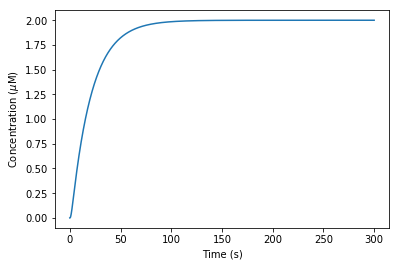

In [1]:
"""
Dendritic nucleation model from Zalevsky et al., Current Biology, Vol 11 No 24
"""
import numpy as np
import matplotlib.pyplot as plt


# Rate constants
k_1a_for = 5.5
k_1a_rev = 3
k_2b_for = 5.5
k_2b_rev = 5.5
k_1b_for = 1
k_2a_for = 1
k_1b_rev = 0.4
k_2a_rev = 0.4
k_3_for = 8.6
k_3_rev = 0.01
k_4_for = 0.05
delta_t = 1e-2
num_steps = 30000
# Initialize variables.
time = np.zeros(num_steps)
state_zero = np.zeros(num_steps)
state_zero[0] = 2
state_1a = np.zeros(num_steps)
state_1b = np.zeros(num_steps)
state_2 = np.zeros(num_steps)
state_3 = np.zeros(num_steps)
state_4 = np.zeros(num_steps)
for i in range(0, num_steps - 1):
    # Calculate differentials.
    delta_state_zero = k_1a_rev * state_1a[i] + k_1b_rev * state_1b[i] \
        - k_1a_for * state_zero[i] \
        - k_1b_for * state_zero[i]
    delta_state_1a = k_1a_for * state_zero[i] + k_2a_rev * state_2[i] \
        - k_1a_rev * state_1a[i] - k_2a_for * state_1a[i]
    delta_state_1b = k_1b_for * state_zero[i] + k_2b_rev * state_2[i] \
        - k_1b_rev * state_1b[i] - k_2b_for * state_1b[i]
    delta_state_2 = k_2a_for * state_1a[i] + k_2b_for * state_1b[i] \
        + k_3_rev * state_3[i] - k_2a_rev * state_2[i] \
        - k_2b_rev * state_2[i] - k_3_for * state_2[i]
    delta_state_3 = k_3_for * state_2[i] - k_4_for * state_3[i] \
        - k_3_rev * state_3[i]
    delta_state_4 = k_4_for * state_3[i]
    # Update states.
    state_zero[i + 1] = state_zero[i] + delta_state_zero * delta_t
    state_1a[i + 1] = state_1a[i] + delta_state_1a * delta_t
    state_1b[i + 1] = state_1b[i] + delta_state_1b * delta_t
    state_2[i + 1] = state_2[i] + delta_state_2 * delta_t
    state_3[i + 1] = state_3[i] + delta_state_3 * delta_t
    state_4[i + 1] = state_4[i] + delta_state_4 * delta_t
    time[i + 1] = time[i] + delta_t
# Plot results.
plt.plot(time, state_4)
plt.ylabel(r'Concentration ($\mu$M)')
plt.xlabel('Time (s)')
plt.show()